# `ggplot2` Exercises


For these exercises, you will be shown an image of a graph and you will be asked to replicate the graph to the best of your ability. You will be using the skills that you have already learned from modules 1 through 4, so there may be some data manipulation and descriptive statistics involved. 

For these exercises we will be working with the `congress-terms.csv` again. We will go ahead and read that in for you...

In [1]:
# read in required packages
library(ggplot2);library(scales); library(grid); library(RColorBrewer); library(dplyr)

# read in data
frame <- read.csv('/dsa/data/all_datasets/congress-terms.csv')
head(frame)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



congress,chamber,bioguide,firstname,middlename,lastname,suffix,birthday,state,party,incumbent,termstart,age
<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
80,house,M000112,Joseph,Jefferson,Mansfield,,1861-02-09,TX,D,Yes,1/3/47,85.9
80,house,D000448,Robert,Lee,Doughton,,1863-11-07,NC,D,Yes,1/3/47,83.2
80,house,S000001,Adolph,Joachim,Sabath,,1866-04-04,IL,D,Yes,1/3/47,80.7
80,house,E000023,Charles,Aubrey,Eaton,,1868-03-29,NJ,R,Yes,1/3/47,78.8
80,house,L000296,William,,Lewis,,1868-09-22,KY,R,No,1/3/47,78.3
80,house,G000017,James,A.,Gallagher,,1869-01-16,PA,R,No,1/3/47,78.0


In the following pictures, the theme is the one that we created in the labs. The code for it is below. 

*if you so desire, feel free to play around with the theme. Create your own. Take a look at some of the palettes `RColorBrewer` comes with. This [site](http://www.lgbmi.com/2012/08/rcolorbrewer-palette-names/) provides some good examples.*

In [2]:
my_theme <- function() {
      
    # Generate the colors for the chart procedurally with RColorBrewer
    palette <- brewer.pal("Greys", n=9) # create a palette of shades of grey 
    color.background = palette[1] # background plot color
    color.grid.major = palette[3] 
    color.grid.minor = palette[2]
    color.axis.text = palette[6] # text color 
    color.axis.title = palette[7]
    color.title = palette[9]

    # Begin construction of chart
    theme_bw(base_size=9) +

    # Set the entire chart region to a light gray color
    theme(panel.background=element_rect(fill=color.background, color=color.background)) +
    theme(plot.background=element_rect(fill=color.background, color=color.background)) +
    theme(panel.border=element_rect(color=color.background)) +

    # Format the grid
    theme(panel.grid.major=element_line(color=color.grid.major,size=.25)) +
    theme(panel.grid.minor=element_blank()) +
    theme(axis.ticks=element_blank()) +

    # Format the legend, but hide by default
    theme(legend.position="bottom") +
    theme(legend.background = element_rect(fill=color.background)) +
    theme(legend.text = element_text(size=7,color=color.axis.title)) +

    # Set title and axis labels, and format these and tick marks
    theme(plot.title=element_text(color=color.title, size=10, vjust=1.25)) +
    theme(axis.text.x=element_text(size=7,color=color.axis.text)) +
    theme(axis.text.y=element_text(size=7,color=color.axis.text)) +
    theme(axis.title.x=element_text(size=8,color=color.axis.title, vjust=0)) +
    theme(axis.title.y=element_text(size=8,color=color.axis.title, vjust=1.25)) +
    
    # Set facet attributes
    theme(strip.background = element_rect(fill=color.background, colour = color.background)) +
    theme(strip.text = element_text(size = 15, colour = color.axis.text)) +

    # Plot margins
    theme(plot.margin = unit(c(0.35, 0.2, 0.3, 0.35), "cm"))
}

**Exercise 1**: Create the following graph:

A histogram of the `age` of all congress members.

<img src="../images/c_age_hist.png">

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


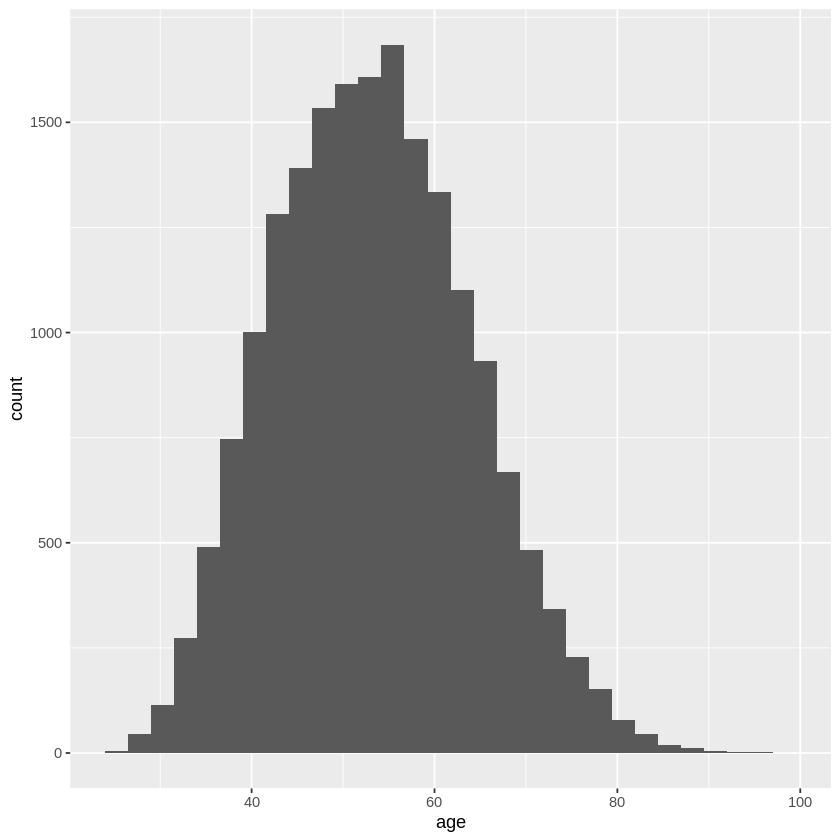

In [6]:
# Exercise 1 code goes here 
# *************************

ggplot(data = frame, aes(age)) + geom_histogram()



**Exercise 2** (Challenge): Create the following graph:

A histogram of `age` as a background layer with a top layer of histograms of `age` faceted by `chamber`. 

**Tip**: *Reference the practices for help.*

<img src="../images/c_age_cham_hist.png">

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


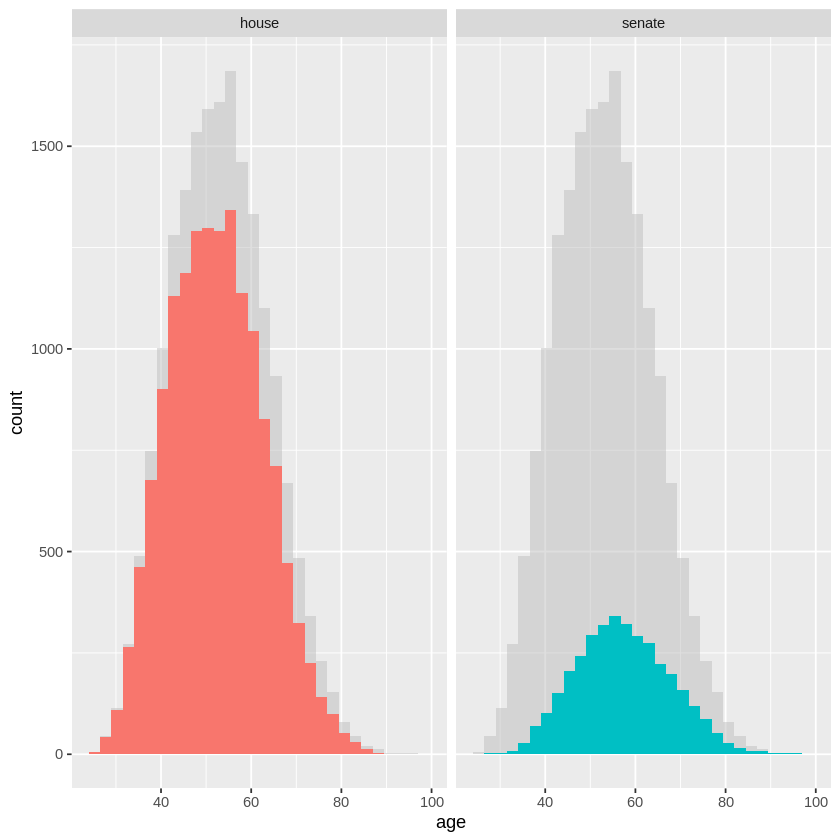

In [36]:
# Exercise 2 code goes here 
# *************************

partial <- frame[, -2]

ggplot(frame, aes(x = age, fill = chamber)) +
  geom_histogram(data = partial, fill = "grey", alpha = .5) +
  geom_histogram() + 
  facet_wrap(~ chamber) +
  guides(fill = FALSE)


**Exercise 3**: Create the following graph:

A line graph of the mean `age` per `congress` number per `chamber`. 

**Tip**: *Group the data frame by `congress` and `chamber`, then find the mean age. When plotting use `geom_line`.*

<img src="../images/c_cham_mage_line.png">

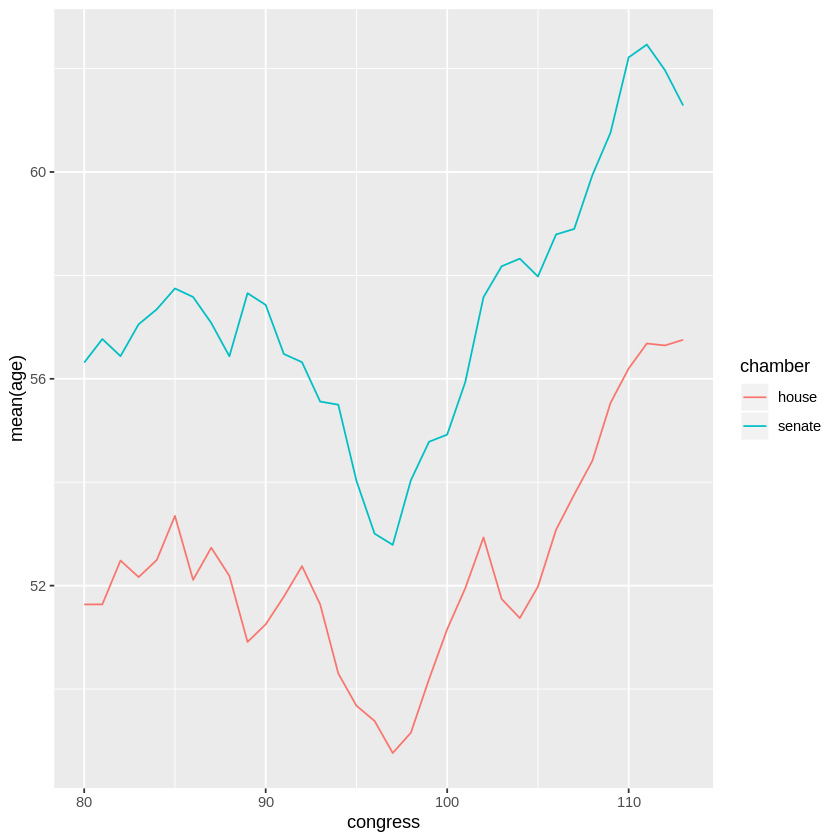

In [25]:
# Exercise 3 code goes here 
# *************************

sum_frame <-
frame %>%
    group_by(congress,chamber) %>%
    summarize(mean(age),sd(age))

plot1 <-ggplot(data = sum_frame,aes(x = congress, y = `mean(age)`, colour = chamber)) +
    geom_line()

plot1


**Exercise 4**: Create the following graph:

Graph of `age` per `congress` number per `chamber`. This time use `geom_smooth` to summarize the trend. 

<img src="../images/c_cham_smage_line.png">

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


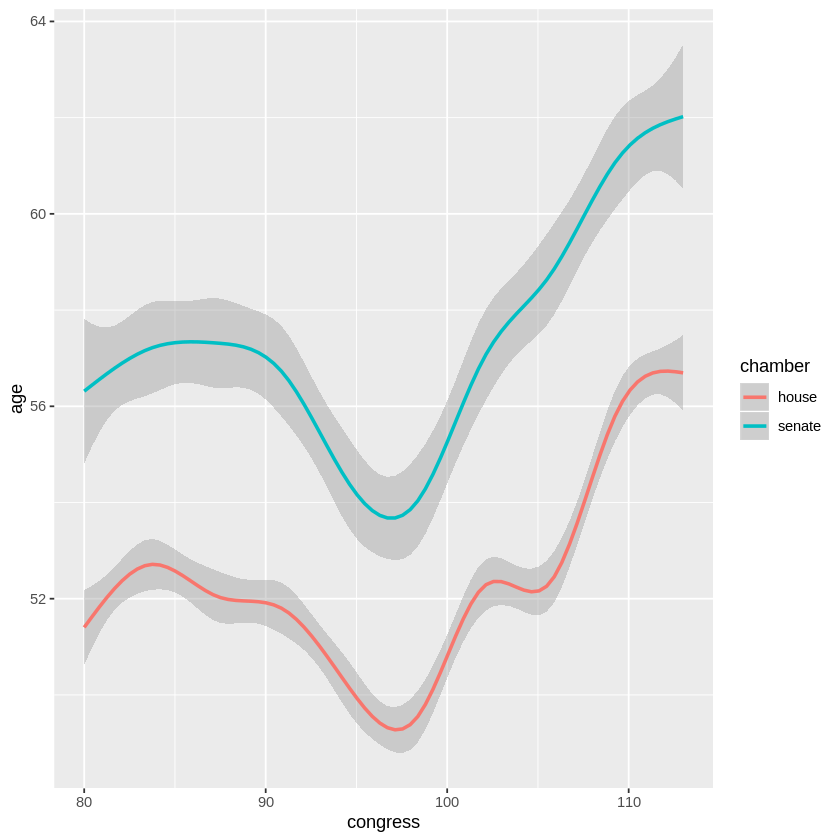

In [30]:
# Exercise 4 code goes here 
# *************************

sum_frame2 <-
frame %>%
    group_by(congress,chamber)

plot2 <-ggplot(data = sum_frame2,aes(x = congress, y = age, colour = chamber)) +
    geom_smooth()

plot2

# **Exercise 5**: Create the following graph:

A line graph of the mean `age` per `congress` number per `party` (only republican and democrat) faceted by `chamber`. 

**Tip**: *Filter on `party` first for only democrats and republicans then group the data frame by `congress`, `chamber` and `party`, then find the mean age.*

<img src="../images/c_cham_mage_party_line.png">

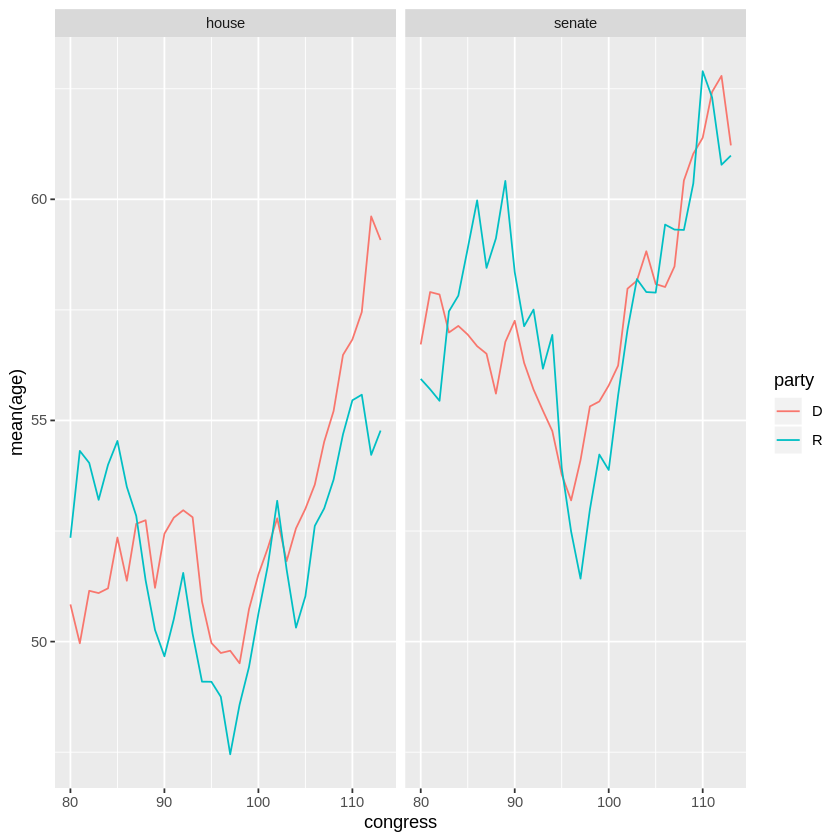

In [40]:
# Exercise 5 code goes here 
# *************************

sum_frame3 <-
frame %>%
    filter(party %in% c('D','R')) %>%
    group_by(congress,chamber,party) %>%
    summarize(mean(age),sd(age))

plot3 <-ggplot(data = sum_frame3,aes(x = congress, y = `mean(age)`, colour = party)) +
    geom_line() +
    facet_wrap(~ chamber)

plot3

# Save your notebook!  Then `File > Close and Halt`